In [56]:
import pandas as pd
data = pd.read_csv('train.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


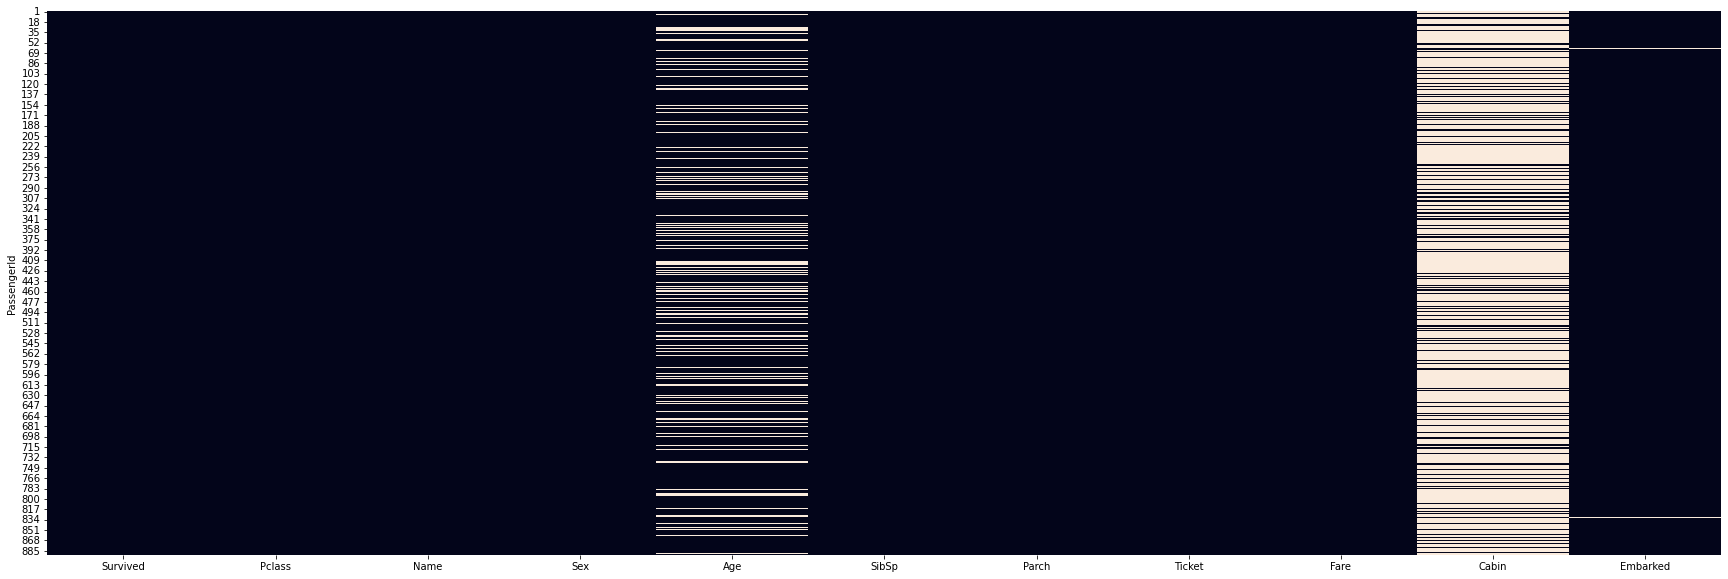

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

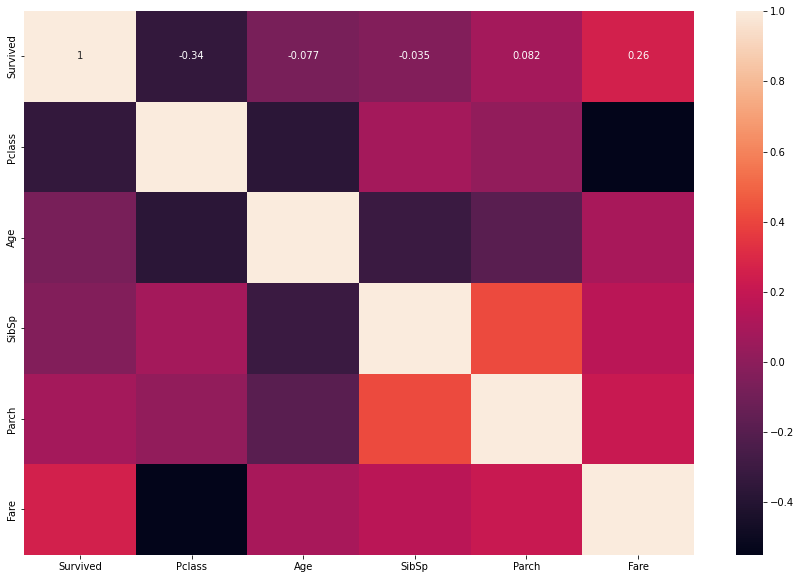

In [60]:
data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()


We can already notice a relatively strong correlation between the number of siblings and the number of parents (Parch and SibSp). There is also a very strong negative correlation between Fare and Class Category as expected (1st class costs systematically higher).

## Data preprocessing

#### Additional data checking

In [61]:
data.duplicated().sum() # Checking for possible duplicates

0

In [63]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can notice that Cabin have a large proportion of missing values, while Age and Embarked have a relatively small to very small proportion

#### Basic preprocessing

In [70]:
basic_data = data.copy()  # We perfrom basic preprocessing on a seperate copy

As a first aproach, we delete the Cabin column since it provides little information considering the size of the dataset. We also sacrifice the 2 rows where Embarked has a null value, ad fill the Age with a basic mean fill.

In [71]:
basic_data.drop(['Cabin'], axis=1, inplace=True)
basic_data.dropna(subset=['Embarked'], inplace=True)
basic_data['Age'].fillna(basic_data['Age'].mean(), inplace=True)

We also remove very sparse data like the Name or the Ticket as a first approach

In [72]:
basic_data.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(basic_data["Sex"])
basic_data["Sex"] = le.transform(basic_data["Sex"])

le.fit(basic_data["Embarked"])
basic_data["Embarked"] = le.fit_transform(basic_data["Embarked"])

In [77]:
basic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,2
2,1,1,0,38.000000,1,0,71.2833,0
3,1,3,0,26.000000,0,0,7.9250,2
4,1,1,0,35.000000,1,0,53.1000,2
5,0,3,1,35.000000,0,0,8.0500,2
6,0,3,1,29.642093,0,0,8.4583,1
7,0,1,1,54.000000,0,0,51.8625,2
8,0,3,1,2.000000,3,1,21.0750,2
9,1,3,0,27.000000,0,2,11.1333,2


In [89]:
from sklearn.model_selection import train_test_split
X = basic_data.drop('Survived', axis=1)
y = basic_data['Survived']
# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def binary_classification_metrics(y_true, y_pred, y_proba=None):
    """
    Function to calculate and print all key binary classification metrics.
    
    Parameters:
    y_true: array-like, true labels
    y_pred: array-like, predicted labels
    y_proba: array-like, predicted probabilities (optional, required for AUC-ROC)
    
    Returns:
    A dictionary containing all calculated metrics.
    """
    
    # Initialize a dictionary to store the metrics
    metrics = {}
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    metrics['Accuracy'] = accuracy
    
    # Precision
    precision = precision_score(y_true, y_pred)
    metrics['Precision'] = precision
    
    # Recall
    recall = recall_score(y_true, y_pred)
    metrics['Recall'] = recall
    
    # F1 Score
    f1 = f1_score(y_true, y_pred)
    metrics['F1 Score'] = f1
    
    # AUC-ROC (only if y_proba is provided)
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        metrics['AUC-ROC'] = auc
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics['Confusion Matrix'] = cm
    
    # Classification Report (Precision, Recall, F1-Score per class)
    class_report = classification_report(y_true, y_pred)
    metrics['Classification Report'] = class_report
    
    # Print all metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if y_proba is not None:
        print(f"AUC-ROC: {auc:.4f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    print("\nClassification Report:")
    print(class_report)
    
    return metrics


In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, penalty='l2', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
metrics = binary_classification_metrics(y_test, y_pred, y_proba=y_proba)

Accuracy: 0.7809
Precision: 0.6923
Recall: 0.7826
F1 Score: 0.7347
AUC-ROC: 0.8526

Confusion Matrix:
[[85 24]
 [15 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [104]:
from sklearn.linear_model import LogisticRegressionCV

model_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=42, penalty='l2')
model_cv.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
metrics = binary_classification_metrics(y_test, y_pred, y_proba=y_proba)
model.get_params()

Accuracy: 0.7809
Precision: 0.6923
Recall: 0.7826
F1 Score: 0.7347
AUC-ROC: 0.8526

Confusion Matrix:
[[85 24]
 [15 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', oob_score=True)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]
metrics = binary_classification_metrics(y_test, y_pred, y_proba=y_proba)

Accuracy: 0.7584
Precision: 0.6711
Recall: 0.7391
F1 Score: 0.7034
AUC-ROC: 0.8359

Confusion Matrix:
[[84 25]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       109
           1       0.67      0.74      0.70        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178

